In [131]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv(r'Mental-Health-Twitter.csv')

# Show basic info
print(df.shape)
df.head()


(20000, 11)


,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [132]:
df = df.drop(columns=['Unnamed: 0'])

In [133]:
# Check for missing values
print(df.isnull().sum())

post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64


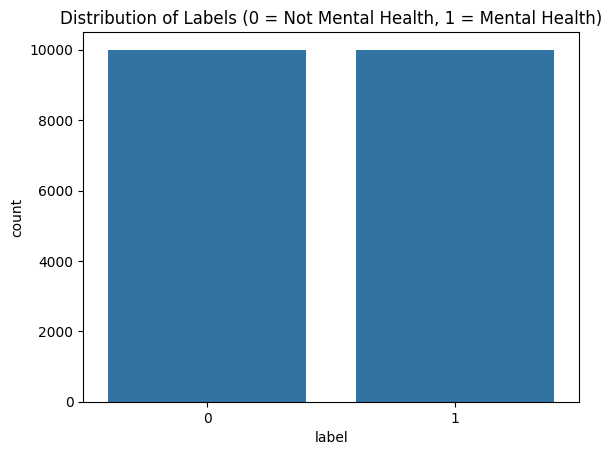

label
1    10000
0    10000
Name: count, dtype: int64


In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distribution
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels (0 = Not Mental Health, 1 = Mental Health)')
plt.show()

# Optional: show exact numbers
print(df['label'].value_counts())


In [135]:
# Check for completely duplicate rows
duplicate_rows = df[df.duplicated(keep=False)]
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate rows found:
                  post_id                    post_created  \
141    631531032924303360  Wed Aug 12 18:21:46 +0000 2015   
142    631531032924303360  Wed Aug 12 18:21:46 +0000 2015   
392    659337651514945537  Wed Oct 28 11:55:20 +0000 2015   
393    659337651514945537  Wed Oct 28 11:55:20 +0000 2015   
537    655952866184679424  Mon Oct 19 03:45:24 +0000 2015   
...                   ...                             ...   
19599  810367005513498626  Sun Dec 18 06:12:04 +0000 2016   
19787  819407379729158145  Thu Jan 12 04:55:17 +0000 2017   
19788  819407379729158145  Thu Jan 12 04:55:17 +0000 2017   
19936  819356367295311873  Thu Jan 12 01:32:35 +0000 2017   
19937  819356367295311873  Thu Jan 12 01:32:35 +0000 2017   

                                               post_text     user_id  \
141    RT @richardbranson: Read this wonderful blog a...  1013187241   
142    RT @richardbranson: Read this wonderful blog a...  1013187241   
392    College minor in subst

# Preprocessing

In [136]:
import pandas as pd
import re

In [137]:
# Load the data
df = pd.read_csv(r'Mental-Health-Twitter.csv')
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [138]:
df_cleaned = df.copy()

In [139]:
df_cleaned = df_cleaned.drop(columns=['Unnamed: 0'])
df_cleaned = df_cleaned.drop_duplicates(keep=False)

In [140]:
# Define a function to remove URLs and mark if there was a URL
def remove_urls(text):
    url_pattern = r'http\S+|www\S+'
    has_url = bool(re.search(url_pattern, text))  # Check if there is a URL
    cleaned_text = re.sub(url_pattern, '', text)  # Remove URLs
    return cleaned_text, has_url

# Apply the function to each row
df_cleaned[['post_text', 'URLs']] = df_cleaned['post_text'].apply(lambda x: pd.Series(remove_urls(x)))

# Done!
df_cleaned[['post_text', 'URLs']].head()

,post_text,URLs
0,It's just over 2 years since I was diagnosed w...,False
1,"It's Sunday, I need a break, so I'm planning t...",False
2,Awake but tired. I need to sleep but my brain ...,False
3,RT @SewHQ: #Retro bears make perfect gifts and...,True
4,It’s hard to say whether packing lists are mak...,False


In [141]:
# --- Step 2: Remove Mentions and track ---
def remove_mentions(text):
    mention_pattern = r'@\w+'
    has_mention = bool(re.search(mention_pattern, text))
    cleaned_text = re.sub(mention_pattern, '', text)
    return cleaned_text, has_mention

df_cleaned[['post_text', 'Mentions']] = df_cleaned['post_text'].apply(lambda x: pd.Series(remove_mentions(x)))
df_cleaned[['post_text', 'Mentions']].head()


,post_text,Mentions
0,It's just over 2 years since I was diagnosed w...,False
1,"It's Sunday, I need a break, so I'm planning t...",False
2,Awake but tired. I need to sleep but my brain ...,False
3,RT : #Retro bears make perfect gifts and are g...,True
4,It’s hard to say whether packing lists are mak...,False


In [142]:
# --- Step 3: Handle Hashtags (extract and optionally remove) ---
def extract_hashtags(text):
    hashtags = re.findall(r'#\w+', text)  # Find hashtags
    return hashtags

# Extract hashtags into a new column
df_cleaned['Hashtags'] = df_cleaned['post_text'].apply(lambda x: extract_hashtags(x))

# (Optional) If you want to also REMOVE hashtags from the post_text:
def remove_hashtags(text):
    return re.sub(r'#\w+', '', text)

# Uncomment below line if you want to remove hashtags from the post_text
df_cleaned['post_text'] = df_cleaned['post_text'].apply(lambda x: remove_hashtags(x))

# View the result
df_cleaned[['post_text', 'Hashtags']].head()

,post_text,Hashtags
0,It's just over 2 years since I was diagnosed w...,"[#anxiety, #depression]"
1,"It's Sunday, I need a break, so I'm planning t...",[#A14]
2,Awake but tired. I need to sleep but my brain ...,[]
3,RT : bears make perfect gifts and are great f...,"[#Retro, #yay]"
4,It’s hard to say whether packing lists are mak...,"[#movinghouse, #anxiety]"


In [143]:
import emoji
import contractions

In [144]:
# --- Step 4: Handle Emojis ---
def convert_emojis(text):
    return emoji.demojize(text, language='en')

df_cleaned['post_text'] = df_cleaned['post_text'].apply(lambda x: convert_emojis(x))

# --- Step 5: Expand Contractions ---
def expand_contractions(text):
    return contractions.fix(text)

df_cleaned['post_text'] = df_cleaned['post_text'].apply(lambda x: expand_contractions(x))

# --- Step 6: Remove Special Characters/Punctuation ---
def remove_special_characters(text):
    # Remove all characters except words, spaces, and hashtags
    cleaned_text = re.sub(r'[^\w\s#]', '', text)
    return cleaned_text

df_cleaned['post_text'] = df_cleaned['post_text'].apply(lambda x: remove_special_characters(x))

df_cleaned['post_text'] = df_cleaned['post_text'].str.replace(r'RT\s{2}', '', regex=True)

In [145]:
# View the result
df_cleaned[['post_text', 'URLs', 'Mentions', 'Hashtags']].head()

,post_text,URLs,Mentions,Hashtags
0,It is just over 2 years since I was diagnosed ...,False,False,"[#anxiety, #depression]"
1,It is Sunday I need a break so I am planning t...,False,False,[#A14]
2,Awake but tired I need to sleep but my brain h...,False,False,[]
3,bears make perfect gifts and are great for be...,True,True,"[#Retro, #yay]"
4,It is hard to say whether packing lists are ma...,False,False,"[#movinghouse, #anxiety]"


In [146]:
# Save
df_cleaned.to_csv('Mental-Health-Twitter-Preprocessed.csv', index=False)

In [147]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def nlp_pipeline(text):
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return tokens

# Apply to the 'post_text' column
df_cleaned['tokens'] = df_cleaned['post_text'].apply(lambda x: nlp_pipeline(x))

# View the result
df_cleaned[['post_text', 'tokens']].head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nanphattongsirisukool/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nanphattongsirisukool/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nanphattongsirisukool/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/nanphattongsirisukool/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/nanphattongsirisukool/nltk_data'
    - '/Users/nanphattongsirisukool/Documents/GitHub/Social-Media-Emotion-Analysis-Framework/studysession/nltk_data'
    - '/Users/nanphattongsirisukool/Documents/GitHub/Social-Media-Emotion-Analysis-Framework/studysession/share/nltk_data'
    - '/Users/nanphattongsirisukool/Documents/GitHub/Social-Media-Emotion-Analysis-Framework/studysession/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
